In [26]:
import pandas as pd
import numpy as np
from numpy.linalg import inv

data = pd.read_csv('penguins.csv')
X = data[['длина плавника']]
y = data['длина клюва']
X.insert(0, 'k0', 1)
k = inv(np.matmul(np.transpose(X), X)).dot(np.transpose(X)).dot(y)
coef_ = k[1 :]
intercept_ = k[0]
pd.DataFrame(k)

C:\Users\AlABelugin\AppData\Local\Temp\ipykernel_7156\3852774467.py:9: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  k = inv(np.matmul(np.transpose(X), X)).dot(np.transpose(X)).dot(y)


,0
0,-7.218558
1,0.254825


C:\Users\AlABelugin\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\AlABelugin\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


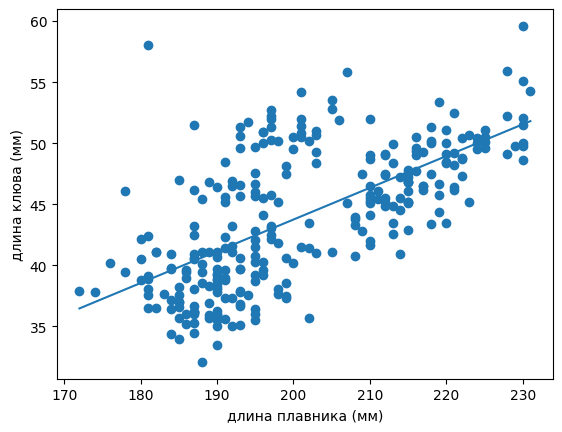

array([0.25980347])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
%matplotlib inline

X = data[['длина плавника']]
y = data['длина клюва']
my_lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
my_lr.fit(X_train, y_train)

def f_line(x):
    return  my_lr.coef_*x + my_lr.intercept_
plt.scatter(X_train, y_train)
x = [np.min(X_train), np.max(X_train)]
y = f_line(x)
plt.plot(x, y)
plt.xlabel('длина плавника (мм)')
plt.ylabel('длина клюва (мм)')
plt.show()
my_lr.coef_